In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
folder="/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/"

In [2]:
import os

In [3]:
from os import listdir

In [4]:
listdir(folder)

['cats', 'panda', 'dogs']

In [5]:
from keras.preprocessing.image import load_img


In [6]:
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

In [7]:
listdir("/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/")

['cats', 'panda', 'dogs']

In [8]:
listdir("/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/cats")

['cats_00305.jpg',
 'cats_00939.jpg',
 'cats_00557.jpg',
 'cats_00199.jpg',
 'cats_00789.jpg',
 'cats_00370.jpg',
 'cats_00910.jpg',
 'cats_00604.jpg',
 'cats_00579.jpg',
 'cats_00261.jpg',
 'cats_00271.jpg',
 'cats_00703.jpg',
 'cats_00553.jpg',
 'cats_00511.jpg',
 'cats_00295.jpg',
 'cats_00487.jpg',
 'cats_00268.jpg',
 'cats_00183.jpg',
 'cats_00722.jpg',
 'cats_00176.jpg',
 'cats_00157.jpg',
 'cats_00753.jpg',
 'cats_00513.jpg',
 'cats_00188.jpg',
 'cats_00377.jpg',
 'cats_00869.jpg',
 'cats_00390.jpg',
 'cats_00225.jpg',
 'cats_00864.jpg',
 'cats_00339.jpg',
 'cats_00519.jpg',
 'cats_00538.jpg',
 'cats_00571.jpg',
 'cats_00611.jpg',
 'cats_00588.jpg',
 'cats_00090.jpg',
 'cats_00587.jpg',
 'cats_00566.jpg',
 'cats_00165.jpg',
 'cats_00825.jpg',
 'cats_00853.jpg',
 'cats_00610.jpg',
 'cats_00550.jpg',
 'cats_00074.jpg',
 'cats_00998.jpg',
 'cats_00732.jpg',
 'cats_00913.jpg',
 'cats_00272.jpg',
 'cats_00189.jpg',
 'cats_00113.jpg',
 'cats_00209.jpg',
 'cats_00532.jpg',
 'cats_00360

In [9]:
folder1="/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/"
x=[]
y=[]
for file1 in listdir(folder):
    file2=folder1+"/"+file1
    for file3 in listdir(file2):
        file4=file2+"/"+file3
        image = load_img(file4,target_size=(300,300))
        image=img_to_array(image)
        x.append(image)
        y.append(file1)
        


In [10]:
len(x)

3000

In [11]:
len(y)

3000

In [12]:
import numpy
from numpy import asarray

In [13]:
x=asarray(x)

In [14]:
y=asarray(y)

In [15]:
x.shape

(3000, 300, 300, 3)

In [16]:
y.shape

(3000,)

In [17]:
y

array(['cats', 'cats', 'cats', ..., 'dogs', 'dogs', 'dogs'], dtype='<U5')

In [18]:
from sklearn.preprocessing import LabelEncoder
m= LabelEncoder()
y = m.fit_transform(y)


In [19]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [20]:
from keras.utils import to_categorical
y = to_categorical(y)

In [21]:
y.shape

(3000, 3)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/2, random_state = 0)

In [23]:
import numpy as np
np.unique(y)

array([0., 1.], dtype=float32)

In [24]:
x_train=x_train/255
x_test=x_test/255

In [25]:
x_train.shape

(1500, 300, 300, 3)

In [26]:
x_test.shape

(1500, 300, 300, 3)

In [27]:
y_train.shape

(1500, 3)

In [28]:
y_test.shape

(1500, 3)

In [29]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [30]:
from keras.layers import Dropout

In [31]:
# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16

In [32]:
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(300, 300, 3))

In [33]:
## example of loading the resnet50 model
#from keras.applications.resnet50 import ResNet50


In [34]:
from keras import Model

In [35]:
# define cnn model
def define_model():
# load model
  model = VGG16(include_top=False, input_shape=(300, 300, 3))
# mark loaded layers as not trainable
  for layer in model.layers:
    layer.trainable = False
# add new classifier layers
  flat1 = Flatten()(model.layers[-1].output)
  class1 = Dense(128, activation="relu", kernel_initializer="he_uniform")(flat1)
 
  output = Dense(3, activation="softmax")(class1)
# define new model
  model = Model(inputs=model.inputs, outputs=output)
# compile model
  opt = Adam(lr=0.01)
  model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
  return model

In [36]:
k4=define_model()

In [37]:
k4.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)      

In [38]:
history=k4.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=5, batch_size=32,verbose=1)

Epoch 1/5
47/47 [==============================] - 13s 284ms/step - loss: 18.2138 - accuracy: 0.5093 - val_loss: 0.9837 - val_accuracy: 0.4267
Epoch 2/5
47/47 [==============================] - 11s 235ms/step - loss: 0.4871 - accuracy: 0.7687 - val_loss: 0.5978 - val_accuracy: 0.8227
Epoch 3/5
47/47 [==============================] - 11s 237ms/step - loss: 0.2023 - accuracy: 0.9267 - val_loss: 0.3932 - val_accuracy: 0.8693
Epoch 4/5
47/47 [==============================] - 11s 243ms/step - loss: 0.0654 - accuracy: 0.9787 - val_loss: 0.3274 - val_accuracy: 0.8953
Epoch 5/5
47/47 [==============================] - 11s 238ms/step - loss: 0.0146 - accuracy: 0.9993 - val_loss: 0.3221 - val_accuracy: 0.8953


In [40]:
from matplotlib import pyplot

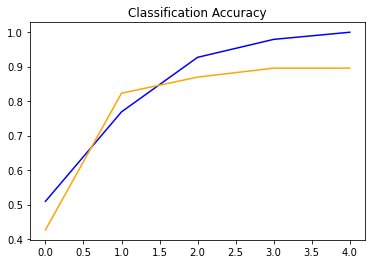

In [41]:
pyplot.title("Classification Accuracy")
pyplot.plot(history.history["accuracy"], color="blue", label="train")
pyplot.plot(history.history["val_accuracy"], color="orange", label="test")